# Drought Declarations

In [1]:
%pylab inline

import pandas as pd
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


In [4]:
data_dir = '../../../DatabaseDrafts'

data = pd.read_excel(f"{data_dir}/DroughtDeclarations_WA_OR.xlsx", skiprows=np.arange(1,38), index_col=0, header=1, usecols="A:M")
data

,State,Geographical Type,"Geography Name (county, watershed, WRIA)",Status,Drought Begin\nDate,Drought End\nDate,Declared\nDate,Drought Declaration Framework,Link to Order,News Article,News Article.1,News Article.2
Drought Year,,,,,,,,,,,,
2019.0,WA,HUC8,Chelan,Governor Declared,NaN,NaN,2019-05-20 00:00:00,Current,https://climate.northwestknowledge.net/COPING_...,https://ecology.wa.gov/About-us/Get-to-know-us...,NaN,NaN
2019.0,WA,HUC8,Colville,Governor Declared,NaN,NaN,2019-05-20 00:00:00,Current,https://climate.northwestknowledge.net/COPING_...,https://ecology.wa.gov/About-us/Get-to-know-us...,NaN,NaN
2019.0,WA,HUC8,Cowlitz,Governor Declared,NaN,NaN,2019-05-20 00:00:00,Current,https://climate.northwestknowledge.net/COPING_...,https://ecology.wa.gov/About-us/Get-to-know-us...,NaN,NaN
2019.0,WA,HUC8,Deschutes,Governor Declared,NaN,NaN,2019-05-20 00:00:00,Current,https://climate.northwestknowledge.net/COPING_...,https://ecology.wa.gov/About-us/Get-to-know-us...,NaN,NaN
2019.0,WA,HUC8,Elwha-Dungeness,Governor Declared,NaN,NaN,2019-05-20 00:00:00,Current,https://climate.northwestknowledge.net/COPING_...,https://ecology.wa.gov/About-us/Get-to-know-us...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1977.0,OR,County,Umatilla,FEMA Declaration,NaN,NaN,NaN,NaN,1977-04-29 00:00:00,NaN,NaN,NaN
1977.0,OR,County,Union,FEMA Declaration,NaN,NaN,NaN,NaN,1977-04-29 00:00:00,NaN,NaN,NaN
1977.0,OR,County,Wallowa,FEMA Declaration,NaN,NaN,NaN,NaN,1977-04-29 00:00:00,NaN,NaN,NaN


In [6]:
# how many do we have dates for?
data['Declared\nDate'].count()

700

Okay, that's not too bad, let's try plotting a year v month matrix

In [22]:
declared_date = 'Declared\nDate'

years = [time.year for time in data[declared_date].values if isinstance(time, datetime.datetime)]
months = [time.month for time in data[declared_date].values if isinstance(time, datetime.datetime)]

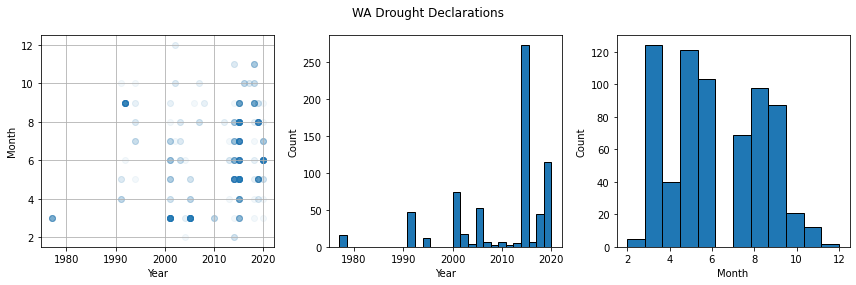

In [55]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
ax = axs.ravel()

ax[0].scatter(years, months, alpha=0.05)
ax[0].grid()
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Month')

ax[1].hist(years, bins=years[0]-years[-1], edgecolor='k')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count')

ax[2].hist(months, bins=12, edgecolor='k')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Count')

fig.suptitle('WA Drought Declarations')
plt.tight_layout()